In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd
import cv2

In [69]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [70]:
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return image

In [82]:
def change(path):
    name = path[path.rfind('/') + 1:]
    img = cv2.imread(path)
    
    sizes = np.arange(1.1, 2, .02)
    size = np.random.choice(sizes)
    print(size)
    
    down_pts = (int(img.shape[0]/size), int(img.shape[1]/size))
    up_pts = (int(img.shape[0]*size), int(img.shape[1]*size))
    
    img_down = cv2.resize(img, down_pts, interpolation= cv2.INTER_LINEAR)
    img_up = cv2.resize(img, up_pts, interpolation= cv2.INTER_LINEAR)
    
    img_br = change_brightness(img, int(np.random.uniform(0, 100)))
    
    img_rot = rotate_image(img, np.random.uniform(50, 360))
    cv2.imwrite(f'./data/up-{name}', img_up)
    cv2.imwrite(f'./data/down-{name}', img_down)
    cv2.imwrite(f'./data/br-{name}', img_br)
    cv2.imwrite(f'./data/rot-{name}', img_rot)
    
    

In [83]:
change('res/box_in_scene.png')

1.4800000000000004


In [ ]:
pts = [x.split('-') for x in output.split('\n')]
pts

In [7]:
df = pd.read_csv('./build/out.txt', header=None)
df.drop(columns=[5], inplace=True)
df['list'] = list(range(2, 7))

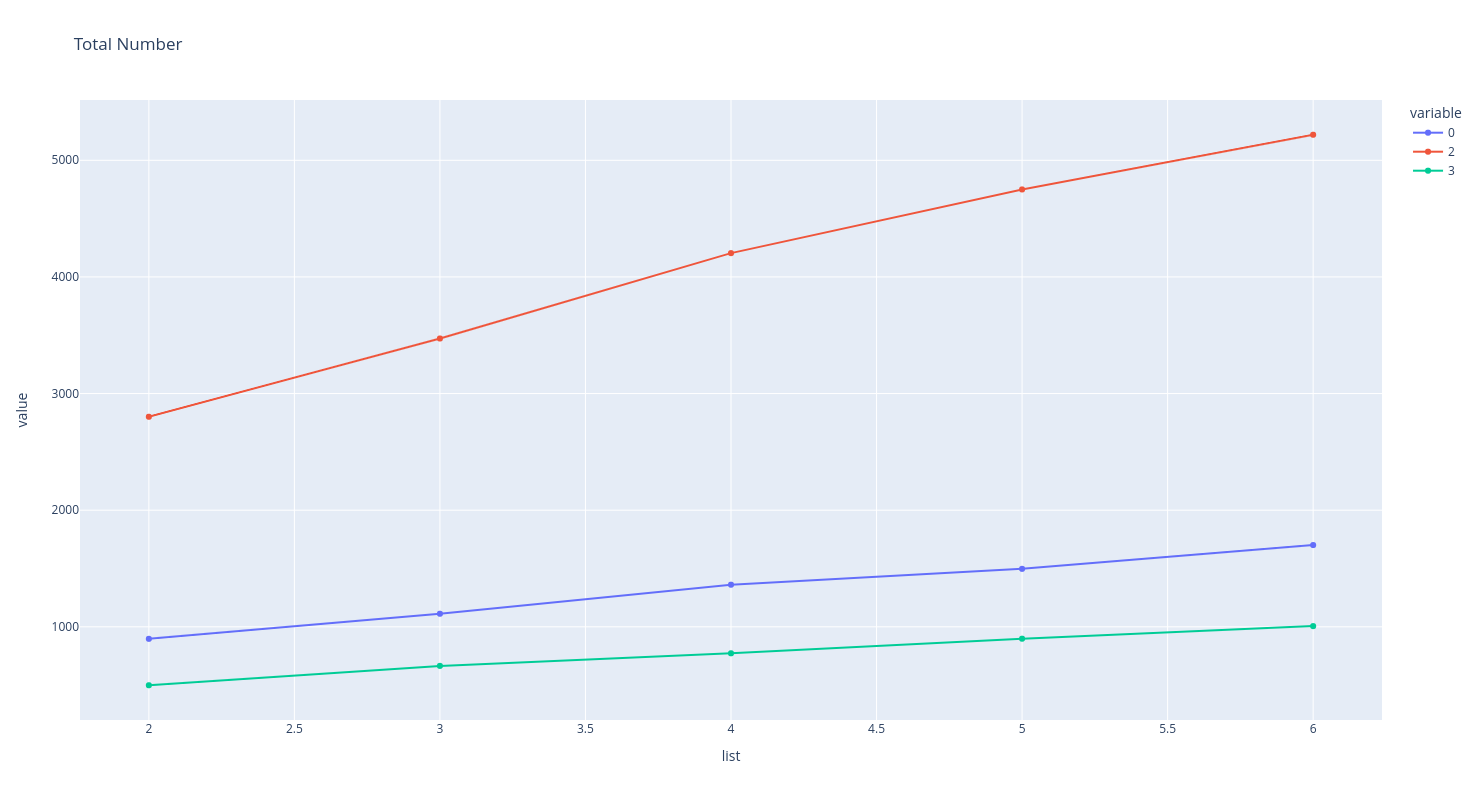

In [18]:
fig = px.line(df, x='list', y=[0,2, 3,],  markers=True, height=800, width=400, title="Total Number")
fig.show()

[512 x 512]
2739
elapsed time: ss.exec: 0.868085s


[910 x 683]
6030
elapsed time: ss.exec: 2.17446s


[3440 x 1440]
31370
elapsed time: ss.exec: 17.4106s

[3840 x 2160]
115826
elapsed time: ss.exec: 31.4622s

